<a href="https://colab.research.google.com/github/YashiGarg016/datapool/blob/main/22051822_Yashi_DATAPOOL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YashiGarg016/datapool-final/refs/heads/main/kindle_data-v2.csv?token=GHSAT0AAAAAACX6GU7KGIQUZLJJRLYDUQF4ZYD4ZAQ')

### Problem Statement: Data Analysis of Kindle Book Sales Performance

**Industry Context:**
The digital publishing industry, especially the e-book segment, has seen rapid growth in recent years, with Amazon’s Kindle platform leading the market. As consumers increasingly shift toward digital content for convenience, affordability, and accessibility, e-book sales have become a key driver of revenue for publishers and authors. However, the market is highly competitive, with thousands of new titles released daily across diverse genres. Publishers and authors face challenges in maximizing visibility, optimizing pricing strategies, and adapting to changing consumer preferences. Understanding the factors that influence sales performance is critical for sustaining growth and driving profitability in this dynamic landscape.

**Objective:**
The primary objective of this analysis is to gain actionable insights into the factors driving Kindle book sales and to develop strategies that can optimize revenue generation. By leveraging sales, customer review, and promotional data, the analysis will explore how various variables—such as genre, price, promotions, and customer engagement—impact sales outcomes. This data-driven approach will enable stakeholders to make informed decisions regarding product listings, pricing models, and marketing initiatives.

**Objective Story:**
In the rapidly evolving e-book market, it is crucial to identify what drives customer purchasing behavior to stay competitive. Through this analysis, we aim to uncover which genres and price points are most profitable, how effective promotions are, and what role customer feedback plays in driving sales. Understanding these dynamics will enable Kindle publishers, authors, and marketers to fine-tune their strategies, ensuring their books stand out in an increasingly saturated market.

Ultimately, the goal of this analysis is to provide actionable recommendations for increasing Kindle book sales, improving customer retention, and maximizing the lifetime value of each title in a highly competitive industry.

In [ ]:
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [ ]:
df.dtypes


,0
asin,object
title,object
author,object
soldBy,object
imgUrl,object
productURL,object
stars,float64
reviews,int64
price,float64
isKindleUnlimited,bool


In [ ]:
df.shape

(133102, 16)

In [ ]:
df['soldBy'].value_counts()

,count
soldBy,
Amazon.com Services LLC,84759
Random House LLC,5872
Hachette Book Group,4736
Penguin Group (USA) LLC,4385
HarperCollins Publishers,4328
Macmillan,3147
Simon and Schuster Digital Sales Inc,3047
Penguin Random House Publisher Services,2390
JOHN WILEY AND SONS INC,2386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [ ]:
df = df.drop('imgUrl', axis=1)

In [ ]:
df.columns

Index(['asin', 'title', 'author', 'soldBy', 'productURL', 'stars', 'reviews',
       'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

In [ ]:
df['reviews'].value_counts()

,count
reviews,
0,64670
1,695
2,515
3,458
4,421
...,...
8756,1
7109,1
1715,1


In [ ]:

df_sorted = df.sort_values('reviews', ascending=False)
title_with_most_reviews = df_sorted.iloc[0]['title']
print(f"The book with the most reviews is: {title_with_most_reviews}")


The book with the most reviews is: Where the Crawdads Sing


In [ ]:

df_max_price = df[df['price'] == df['price'].max()]
book_with_max_price = df_max_price['title'].iloc[0]
max_price = df['price'].max()

print(f"The book with the maximum price ({max_price}) is: {book_with_max_price}")

df_min_price = df[df['price'] == df['price'].min()]
book_with_min_price = df_min_price['title'].iloc[0]
min_price = df['price'].min()

print(f"The book with the minimum price ({min_price}) is: {book_with_min_price}")


The book with the maximum price (682.0) is: Drugs in Litigation: Damage Awards Involving Prescription and Nonprescription Drugs 2023 Edition
The book with the minimum price (0.0) is: The Girls Are Gone: The True Story of Two Sisters Who Vanished, the Father Who Kept Searching, and the Adults Who Conspired to Keep the Truth Hidden


In [ ]:

bins = range(0, int(df['price'].max()) + 6, 5)

df['price_range'] = pd.cut(df['price'], bins=bins)

price_range_counts = df.groupby('price_range')['title'].count()

print(price_range_counts)


price_range
(0, 5]        30404
(5, 10]       42616
(10, 15]      27420
(15, 20]       9059
(20, 25]       3477
              ...  
(660, 665]        1
(665, 670]        0
(670, 675]        0
(675, 680]        0
(680, 685]        1
Name: title, Length: 137, dtype: int64


<ipython-input-16-958a6eee6d47>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_counts = df.groupby('price_range')['title'].count()


In [ ]:

most_books_price_range = price_range_counts.idxmax()

print(f"The price range with the most books is: {most_books_price_range}")


The price range with the most books is: (5, 10]


In [ ]:
both_kindleUn_bestseller = df[(df['isKindleUnlimited'] == True) & (df['isBestSeller'] == True)]

number_of_books = len(both_kindleUn_bestseller)

print(f"The number of books that are available on Kindle Unlimited and are Best Seller is: {number_of_books}")


The number of books that are available on Kindle Unlimited and are Best Seller is: 1465


In [ ]:
both_editors_pick_kindleUn = df[(df['isKindleUnlimited'] == True) & (df['isEditorsPick'] == True)]

number_of_books = len(both_editors_pick_kindleUn)

print(f"The number of books that are available on Kindle Unlimited and are Editor's Pick is: {number_of_books}")

The number of books that are available on Kindle Unlimited and are Editor's Pick is: 402


In [ ]:
both_goodReads_kindleUn = df[(df['isKindleUnlimited'] == True) & (df['isGoodReadsChoice'] == True)]

number_of_books = len(both_goodReads_kindleUn)

print(f"The number of books that are available on Kindle Unlimited and are Editor's Pick is: {number_of_books}")

The number of books that are available on Kindle Unlimited and are Editor's Pick is: 179


In [ ]:

rating_counts = df.groupby('stars')['title'].count()

print(rating_counts)
most_books_rating = rating_counts.idxmax()

print(f"The rating with the most books is: {most_books_rating}")


stars
0.0     3182
1.0       83
1.5        3
1.6        3
1.7        1
1.8        4
1.9        2
2.0       49
2.1        3
2.2        5
2.3        8
2.4        7
2.5       22
2.6       16
2.7       21
2.8       16
2.9       34
3.0      185
3.1       48
3.2       62
3.3      111
3.4      131
3.5      287
3.6      347
3.7      484
3.8      829
3.9     1309
4.0     2531
4.1     3679
4.2     6337
4.3    10629
4.4    16214
4.5    22367
4.6    24163
4.7    20049
4.8    11730
4.9     3329
5.0     4822
Name: title, dtype: int64
The rating with the most books is: 4.6


In [ ]:

df_non_null_reviews = df.dropna(subset=['reviews'])

average_stars = round(df_non_null_reviews['stars'].mean(), 1)

print(f"The average stars of books (excluding those with null reviews) is: {average_stars}")


The average stars of books (excluding those with null reviews) is: 4.4


In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

author_book_counts = df.groupby('author')['title'].count()

top_10_authors = author_book_counts.sort_values(ascending=False).head(10)

print("Top 10 authors with the most books:")
print(top_10_authors)


Top 10 authors with the most books:
author
James Patterson           212
DK Eyewitness             163
DK                        155
Captivating History       120
Fodor's Travel Guides     115
Erin Hunter               114
J.K. Rowling              113
Hourly History            103
America's Test Kitchen     99
Stephen King               99
Name: title, dtype: int64


In [ ]:

seller_book_counts = df.groupby('soldBy')['title'].count()

top_5_sellers = seller_book_counts.sort_values(ascending=False).head(5)

print("Top 5 sellers with the most books sold:")
print(top_5_sellers)


Top 5 sellers with the most books sold:
soldBy
Amazon.com Services LLC     84759
Random House LLC             5872
Hachette Book Group          4736
Penguin Group (USA) LLC      4385
HarperCollins Publishers     4328
Name: title, dtype: int64


<ipython-input-25-37ffe5a572da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_stars_by_price_range = df.groupby('price_range')['stars'].mean()


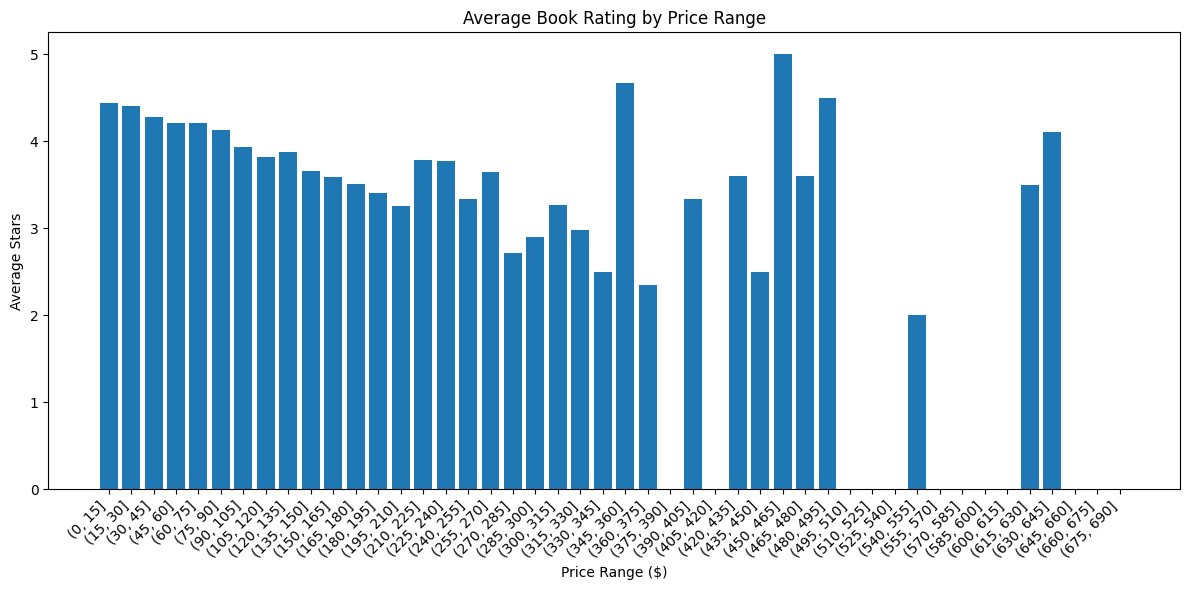

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

bins = range(0, int(df['price'].max()) + 16, 15)

df['price_range'] = pd.cut(df['price'], bins=bins)

average_stars_by_price_range = df.groupby('price_range')['stars'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_stars_by_price_range.index.astype(str), average_stars_by_price_range.values)
plt.xlabel('Price Range ($)')
plt.ylabel('Average Stars')
plt.title('Average Book Rating by Price Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: plot an interactive bar graph of books published date. date should be grouped by the year. The y axis should have every year after 1999.

import pandas as pd
import plotly.express as px

# Convert 'publishedDate' to datetime objects
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

# Extract the year from the 'publishedDate' column
df['Year'] = df['publishedDate'].dt.year

# Filter out years before 1999
df_filtered = df[df['Year'] >= 1900]

# Group by year and count the number of books published in each year
book_counts_by_year = df_filtered.groupby('Year')['title'].count()

# Create an interactive bar graph using Plotly
fig = px.bar(
    book_counts_by_year,
    x=book_counts_by_year.index,
    y=book_counts_by_year.values,
    labels={'x': 'Year', 'y': 'Number of Books'},
    title='Number of Books Published Each Year (Since 1999)',
)

fig.show()


In [ ]:

import plotly.express as px

df['review_stars'] = df['stars'].round(0).astype(int)

fig = px.pie(df, names='review_stars', title='Distribution of Book Ratings')

fig.show()


In [ ]:
# prompt: list out the different catergory_name amd the count of each

import pandas as pd

category_counts = df.groupby('category_name')['title'].count()

print("Different Category Names and Their Counts:")
print(category_counts)


Different Category Names and Their Counts:
category_name
Arts & Photo graphy             4916
Biographies & Memoirs           5405
Business & Money                2577
Children's eBooks               5747
Comics                           478
Computers & Technology          5504
Cookbooks, Food & Wine          5333
Crafts, Hobbies & Home          5502
Education & Teaching            4986
Engineering & Transportation    6162
Foreign Language                5724
Health, Fitness & Dieting       1585
History                         2045
Humor & Entertainment           4095
LGBTQ+ eBooks                   5517
Law                             5027
Literature & Fiction            4152
Medical                         2583
Mystery, Thriller & Suspense    6272
Nonfiction                       899
Parenting & Relationships       5901
Politics & Social Sciences      4207
Reference                       3388
Religion & Spirituality         4970
Romance                         2214
Science & Math    

In [ ]:
# prompt: find the categories with the minimum and maximum books

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming df is your DataFrame and it has a 'category_name' column

# Calculate the number of books in each category
category_counts = df.groupby('category_name')['title'].count()

# Find the category with the minimum number of books
min_books_category = category_counts.idxmin()
min_books_count = category_counts.min()

# Find the category with the maximum number of books
max_books_category = category_counts.idxmax()
max_books_count = category_counts.max()

print(f"The category with the minimum number of books ({min_books_count}) is: {min_books_category}")
print(f"The category with the maximum number of books ({max_books_count}) is: {max_books_category}")


The category with the minimum number of books (478) is: Comics
The category with the maximum number of books (6272) is: Mystery, Thriller & Suspense


In [ ]:
# prompt: plot an interactive bar chart for the category name

import plotly.express as px

# Assuming 'df' is your DataFrame and it has a 'category_name' column

# Calculate the number of books in each category
category_counts = df.groupby('category_name')['title'].count()

# Create an interactive bar chart using Plotly
fig = px.bar(
    category_counts,
    x=category_counts.index,
    y=category_counts.values,
    labels={'x': 'Category Name', 'y': 'Number of Books'},
    title='Number of Books in Each Category',
)

fig.show()
